In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [67]:
(train_pic,train_label),(test_pic,test_label)=datasets.fashion_mnist.load_data()

In [45]:
train_pic.shape

(60000, 28, 28)

In [46]:
train_label.shape

(60000,)

In [47]:
test_label.shape

(10000,)

In [48]:
test_pic.shape

(10000, 28, 28)

In [49]:
labels='T-shirt/top,Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot,'
labels=labels.split(',')
labels

['T-shirt/top',
 'Trouser',
 ' Pullover',
 ' Dress',
 ' Coat',
 ' Sandal',
 ' Shirt',
 ' Sneaker',
 ' Bag',
 ' Ankle Boot',
 '']

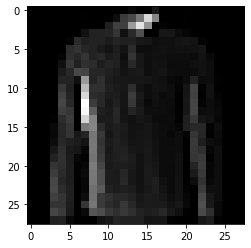

6

In [50]:
i=24495
plt.imshow(train_pic[i],cmap='gray')
plt.show()
train_label[i]

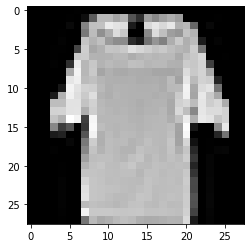

6

In [51]:
i=1165
plt.imshow(train_pic[i],cmap='gray')
plt.show()
train_label[i]

In [52]:
train_pic=train_pic.reshape(60000,28,28,1)
test_pic=test_pic.reshape(10000,28,28,1)

In [53]:
train_pic=train_pic/255
test_pic=test_pic/255

In [54]:
train_pic[0].shape

(28, 28, 1)

In [55]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [56]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
model.fit(train_pic,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.3860 - accuracy: 0.8594
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2505 - accuracy: 0.9075
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2036 - accuracy: 0.9247
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1643 - accuracy: 0.9398
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1313 - accuracy: 0.9518
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1041 - accuracy: 0.9608
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0837 - accuracy: 0.9693
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0662 - accuracy: 0.9753
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0540 - accuracy: 0.9796
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [58]:
y_pred=model.predict(test_pic)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [59]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [60]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [61]:
a=model.predict(test_pic)[0]
a=np.argmax(a)
a=labels[a]
a

' Ankle Boot'

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score,recall_score

In [63]:
confusion_matrix(y_pred,test_label)

array([[839,   3,  10,  18,   1,   0,  93,   0,   4,   0],
       [  0, 978,   2,   2,   0,   0,   1,   0,   0,   0],
       [ 29,   2, 921,  14,  96,   1,  60,   0,   4,   0],
       [ 12,   9,   4, 897,   9,   0,  18,   0,   3,   0],
       [  4,   1,  27,  32, 843,   0,  52,   0,   1,   0],
       [  2,   0,   0,   2,   0, 987,   0,  10,   2,   4],
       [106,   3,  36,  28,  47,   0, 768,   0,   4,   1],
       [  0,   0,   0,   0,   0,   9,   0, 959,   2,  19],
       [  8,   4,   0,   7,   4,   0,   8,   1, 980,   0],
       [  0,   0,   0,   0,   0,   3,   0,  30,   0, 976]])

In [64]:
accuracy_score(y_pred,test_label)

0.9148

In [65]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       968
           1       0.98      0.99      0.99       983
           2       0.92      0.82      0.87      1127
           3       0.90      0.94      0.92       952
           4       0.84      0.88      0.86       960
           5       0.99      0.98      0.98      1007
           6       0.77      0.77      0.77       993
           7       0.96      0.97      0.96       989
           8       0.98      0.97      0.97      1012
           9       0.98      0.97      0.97      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [66]:
model.save('fashion_mnist_CNN.h5')